In [68]:
## import the library needed 
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
import idx2numpy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [88]:
# this class hold all functions you neeed in your model 
class pre_model () :
    data = {}
    predictions = {}
    def __init__ (self,number): 
        self.number_need = number
    
    def read_data (self) :
        x_train = idx2numpy.convert_from_file("data/train-images.idx3-ubyte")
        y_train = pd.DataFrame(idx2numpy.convert_from_file("data/train-labels.idx1-ubyte"),columns = ["label"])
        x_test  = idx2numpy.convert_from_file("data/t10k-images.idx3-ubyte")
        y_test  = pd.DataFrame(idx2numpy.convert_from_file("data/t10k-labels.idx1-ubyte"),columns = ["labels"])
        
        x_train = pd.DataFrame(x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
        x_test = pd.DataFrame(x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

        self.data = {
            "x_train" : x_train,
            "y_train"  : y_train,
            "x_test" : x_test,
            "y_test" : y_test
        }
        return self.data 
    
    def normalize (self) :
        x_train_norm = self.data["x_train"] / 255.0

        data = {
            "x_train" : x_train_norm,
             "y_train": self.data["y_train"],
             "x_test"  : self.data["x_test"],
             "y_test" : self.data["y_test"]
        }

        return self.data 
        
    def plot_summary_of_data (self) :
        sns.set()
        return sns.countplot(x= "label" , data= self.data["y_train"])

    def show_examples (self) :
        x_train = self.data["x_train"]
        examples = x_train[100:105].to_numpy()
        _, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
        for ax, image in zip(axes, examples):
            ax.set_axis_off()
            image = image.reshape(28, 28)
            ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        return plt.show()
    
    def convert_MC_to_BC(self):
        y_train = (self.data["y_train"] == self.number_need )
        y_test = (self.data["y_test"] == self.number_need)
        self.data = {
            'x_train' : self.data["x_train"],
            'y_train' : y_train,
            'x_test'  : self.data['x_test'],
            'y_test' : y_test
        }
        
        return self.data 
   
    def  make_test_predictions (self):
        model = LogisticRegression(max_iter = 100 )
        model.fit(self.data["x_train"],self.data["y_train"])
        train_predictions = model.predict(self.data["x_train"]).reshape(-1,1)
        test_predictions = model.predict(self.data["x_test"]).reshape(-1,1)
        self.predictions = {
            "train_predictions" : train_predictions,
            "test_predictions" : test_predictions
        }
        print("train accuracy is = ", np.mean(self.data["y_train"] == train_predictions))
        print("test accuracy is = ", np.mean(self.data["y_test"] == test_predictions))
        return self.predictions
    
    
    def make_plot_for_testing_data(self):
        x_test = self.data["x_test"].to_numpy()
        predictions = self.predictions["test_predictions"]
        _, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
        for ax, image , prediction in zip(axes, x_test , predictions):
            ax.set_axis_off()
            image = image.reshape(28, 28)
            ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            ax.set_title(f"{prediction}")
        return plt.show()
    
    def confusion_matrix (self):
                        # actual values
            actual = self.data["y_test"]
            # predicted values
            predicted = self.predictions["test_predictions"]

            # confusion matrix
            matrix = confusion_matrix(actual,predicted, labels=[1,0])
            print('Confusion matrix : \n',matrix)

            # outcome values order in sklearn
            tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
            print('Outcome values : \n', tp, fn, fp, tn)

            # classification report for precision, recall f1-score and accuracy
            matrix = classification_report(actual,predicted,labels=[1,0])
            print('Classification report : \n',matrix)
            
            return 
    

    
    
    


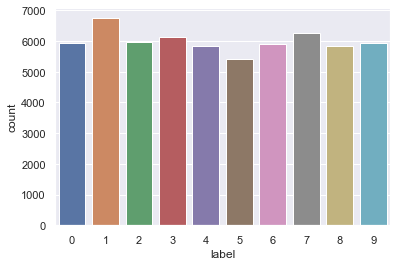

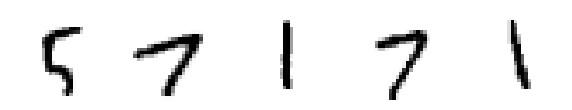

C:\Users\mohamed seyam\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mohamed seyam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy is =  label    0.993283
dtype: float64
test accuracy is =  labels    0.9922
dtype: float64


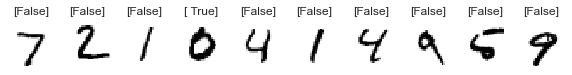

Confusion matrix : 
 [[ 948   32]
 [  46 8974]]
Outcome values : 
 948 32 46 8974
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96       980
           0       1.00      0.99      1.00      9020

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [87]:
pre_model = pre_model(0)
pre_model.read_data()
pre_model.normalize()
pre_model.plot_summary_of_data()
pre_model.show_examples()
data = pre_model.convert_MC_to_BC()
predictions = pre_model.make_test_predictions()
pre_model.make_plot_for_testing_data()
pre_model.confusion_matrix()

In [85]:
predictions

{'train_predictions': array([[False],
        [ True],
        [False],
        ...,
        [False],
        [False],
        [False]]),
 'test_predictions': array([[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])}

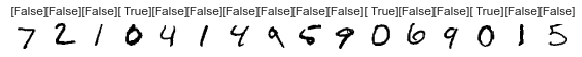

In [305]:
x_test = data["x_test"].to_numpy()
_, axes = plt.subplots(nrows=1, ncols=16, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predictions):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f' {prediction}')